In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns

df = pd.read_csv("bitcoin_historical_data_cleaned.csv")
df.describe()


,Close,High,Low,Open,Volume
count,2232.000000,2232.000000,2232.000000,2232.000000,2.232000e+03
mean,32720.074108,33397.097056,31939.574220,32680.525314,3.085689e+10
std,23705.349337,24194.384984,23145.630811,23677.004904,1.946871e+10
min,3399.470000,3427.950000,3391.020000,3401.380000,4.324201e+09
25%,10689.750000,10896.460000,10447.137500,10677.445000,1.803917e+10
50%,27794.805000,28305.765000,27245.495000,27781.830000,2.703812e+10
75%,47286.945000,48476.105000,46444.472500,47291.032500,3.818185e+10
max,106146.270000,109114.880000,105291.730000,106147.300000,3.509679e+11


In [126]:
print(df.describe().round(3))

            Close        High         Low        Open        Volume
count    2232.000    2232.000    2232.000    2232.000  2.232000e+03
mean    32720.074   33397.097   31939.574   32680.525  3.085689e+10
std     23705.349   24194.385   23145.631   23677.005  1.946871e+10
min      3399.470    3427.950    3391.020    3401.380  4.324201e+09
25%     10689.750   10896.460   10447.138   10677.445  1.803917e+10
50%     27794.805   28305.765   27245.495   27781.830  2.703812e+10
75%     47286.945   48476.105   46444.472   47291.032  3.818185e+10
max    106146.270  109114.880  105291.730  106147.300  3.509679e+11


In [127]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.head())

        Date    Close     High      Low     Open      Volume
0 2019-01-01  3843.52  3850.91  3707.23  3746.71  4324200990
1 2019-01-02  3943.41  3947.98  3817.41  3849.22  5244856836
2 2019-01-03  3836.74  3935.69  3826.22  3931.05  4530215219
3 2019-01-04  3857.72  3865.93  3783.85  3832.04  4847965467
4 2019-01-05  3845.19  3904.90  3836.90  3851.97  5137609824


In [128]:
for col in df.columns:
    if col !="Date":
        df[col] = pd.to_numeric(df[col], errors='coerce')

df.dtypes

Date      datetime64[ns]
Close            float64
High             float64
Low              float64
Open             float64
Volume             int64
dtype: object

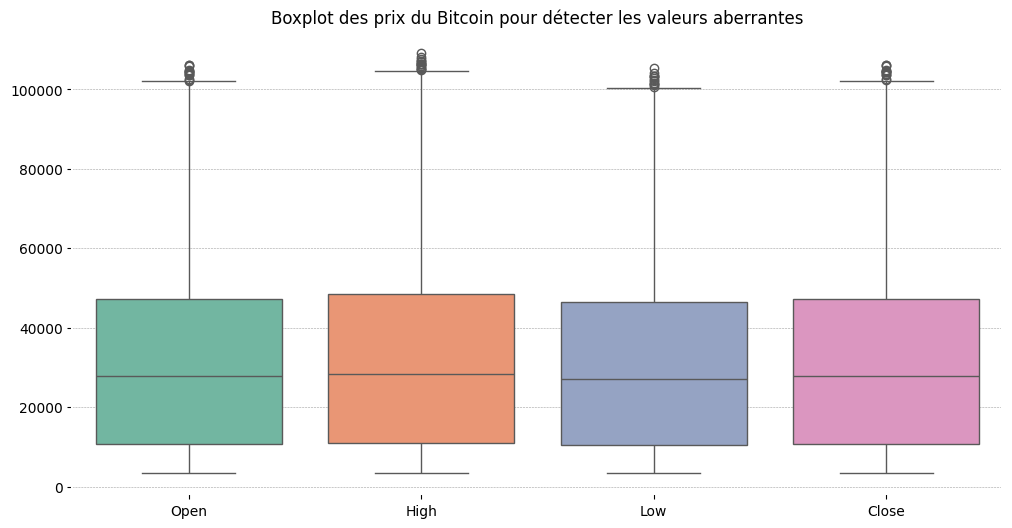

In [129]:


plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']], palette="Set2")
plt.title("Boxplot des prix du Bitcoin pour détecter les valeurs aberrantes")
plt.show()


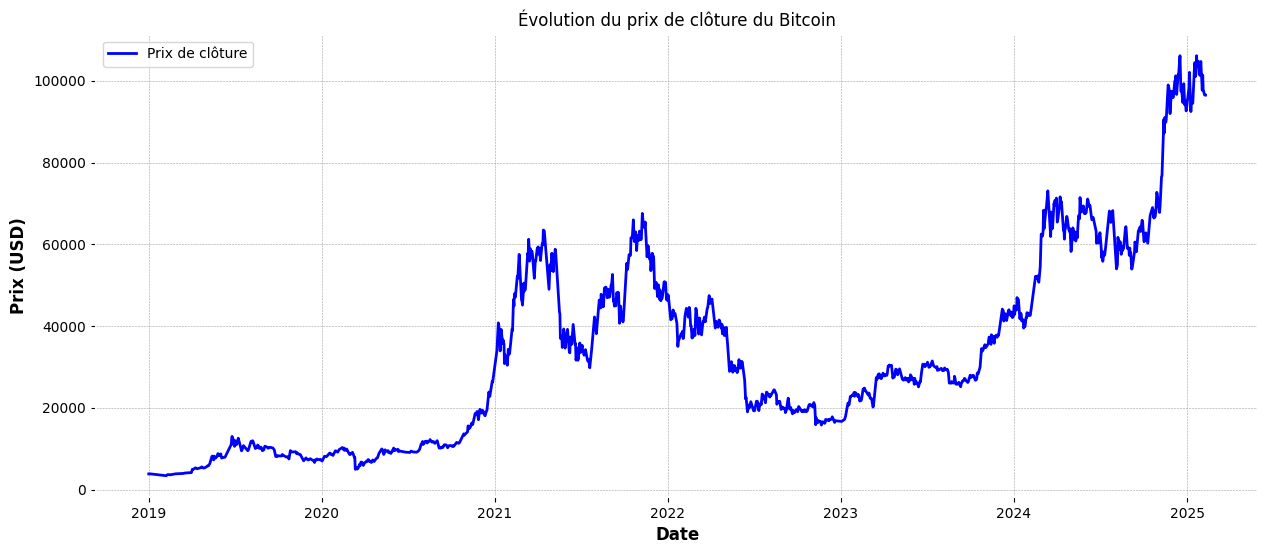

In [130]:

plt.figure(figsize=(15, 6))
plt.plot(df["Date"], df["Close"], label="Prix de clôture", color="blue")
plt.xlabel("Date")
plt.ylabel("Prix (USD)")
plt.title("Évolution du prix de clôture du Bitcoin")
plt.legend()
plt.show()


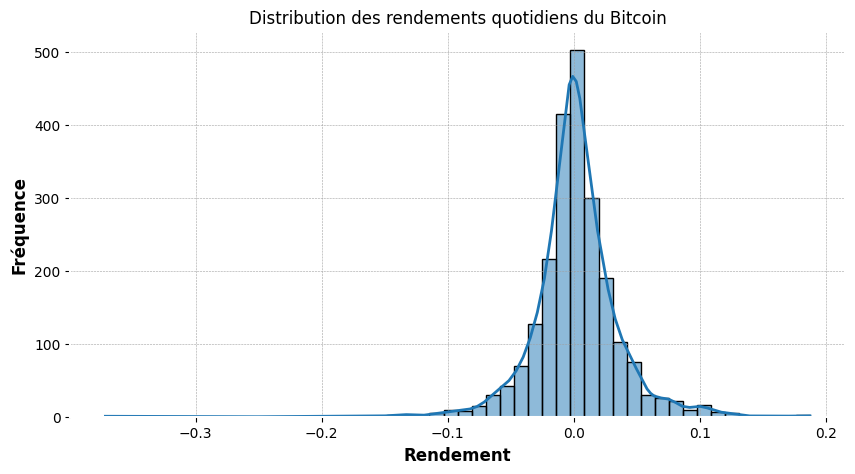

In [131]:
df["Daily Return"] = df["Close"].pct_change()
plt.figure(figsize=(10, 5))
sns.histplot(df["Daily Return"].dropna(), bins=50, kde=True)
plt.title("Distribution des rendements quotidiens du Bitcoin")
plt.xlabel("Rendement")
plt.ylabel("Fréquence")
plt.show()


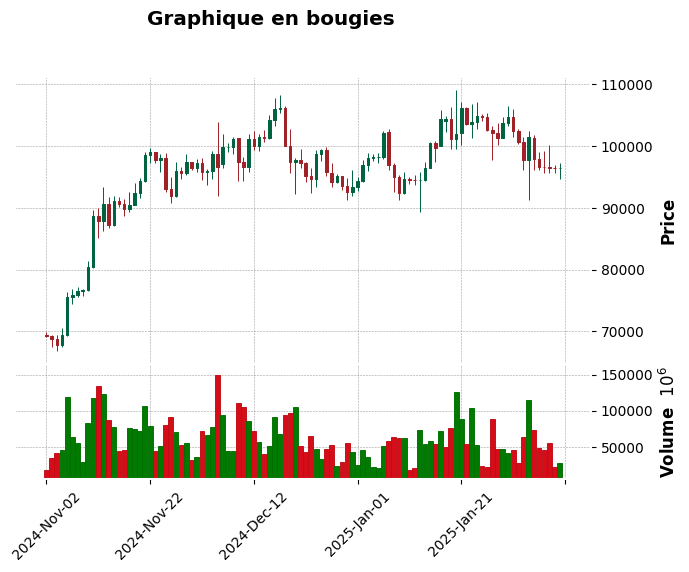

In [132]:

df.set_index('Date', inplace=True)
mpf.plot(df.tail(100), type='candle', style='charles', volume=True, title="Graphique en bougies")

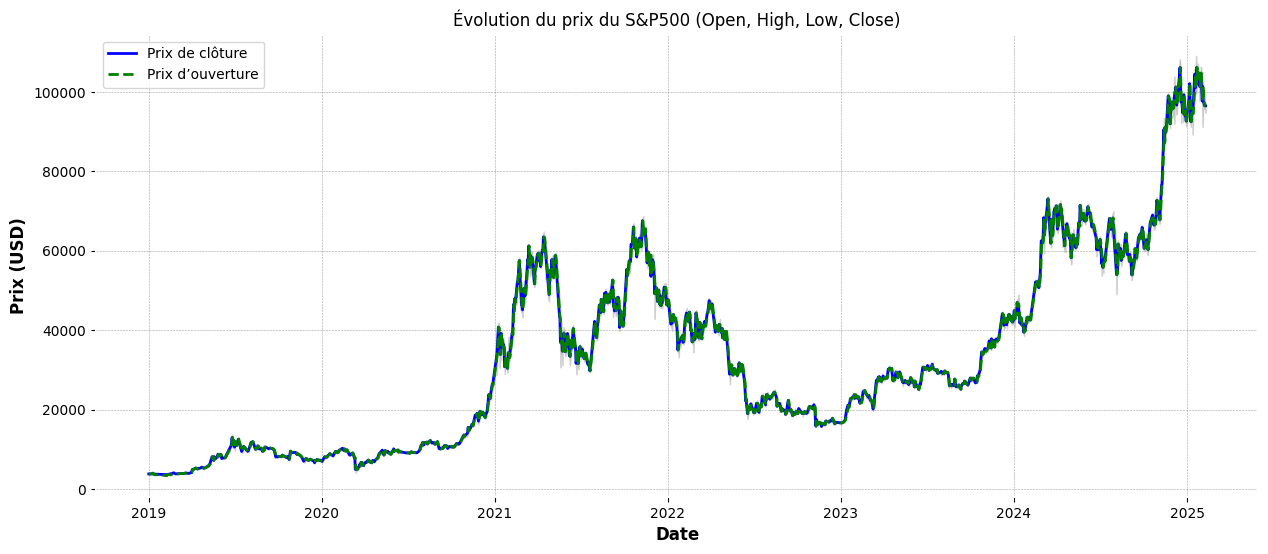

In [133]:
plt.figure(figsize=(15, 6))

# Tracer les prix de clôture et d'ouverture
plt.plot(df.index, df["Close"], label="Prix de clôture", color="blue")
plt.plot(df.index, df["Open"], label="Prix d’ouverture", color="green", linestyle="dashed")

# Remplir entre le prix le plus bas et le plus haut
plt.fill_between(df.index, df["Low"], df["High"], color="gray", alpha=0.3)

# Ajouter les labels et la légende
plt.xlabel("Date")
plt.ylabel("Prix (USD)")
plt.title("Évolution du prix du S&P500 (Open, High, Low, Close)")
plt.legend()

# Afficher le graphique
plt.show()


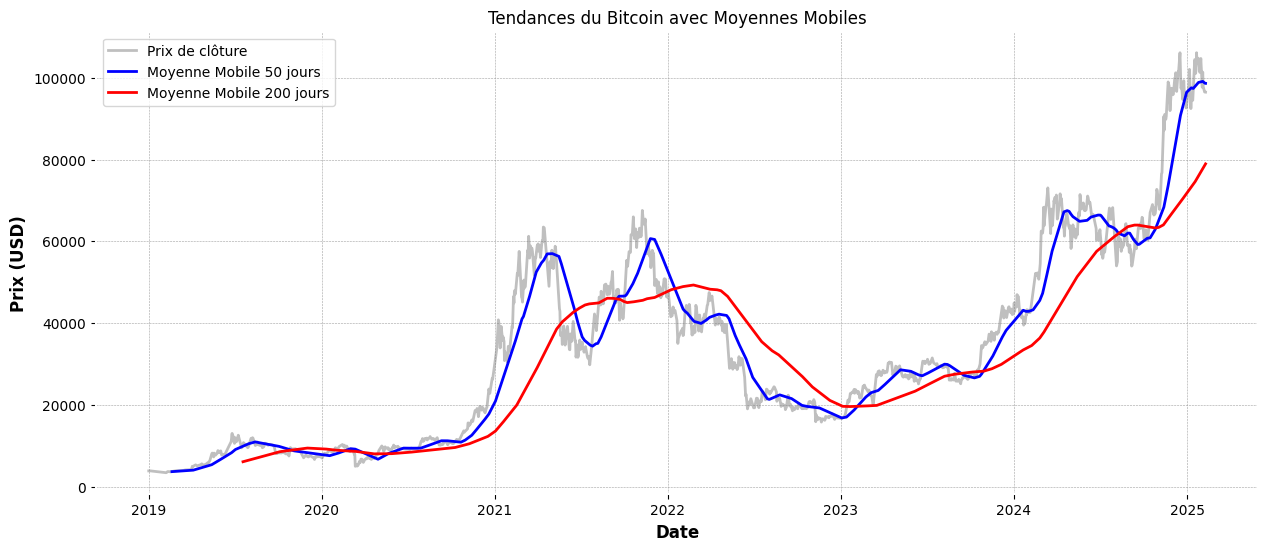

In [134]:
# Calcul des moyennes mobiles
df["SMA_50"] = df["Close"].rolling(window=50).mean()
df["SMA_200"] = df["Close"].rolling(window=200).mean()

# Création du graphique
plt.figure(figsize=(15, 6))

# Tracer les prix de clôture et les moyennes mobiles
plt.plot(df.index, df["Close"], label="Prix de clôture", color="gray", alpha=0.5)
plt.plot(df.index, df["SMA_50"], label="Moyenne Mobile 50 jours", color="blue")
plt.plot(df.index, df["SMA_200"], label="Moyenne Mobile 200 jours", color="red")

# Ajouter les labels et la légende
plt.xlabel("Date")
plt.ylabel("Prix (USD)")
plt.title("Tendances du Bitcoin avec Moyennes Mobiles")
plt.legend()

# Afficher le graphique
plt.show()


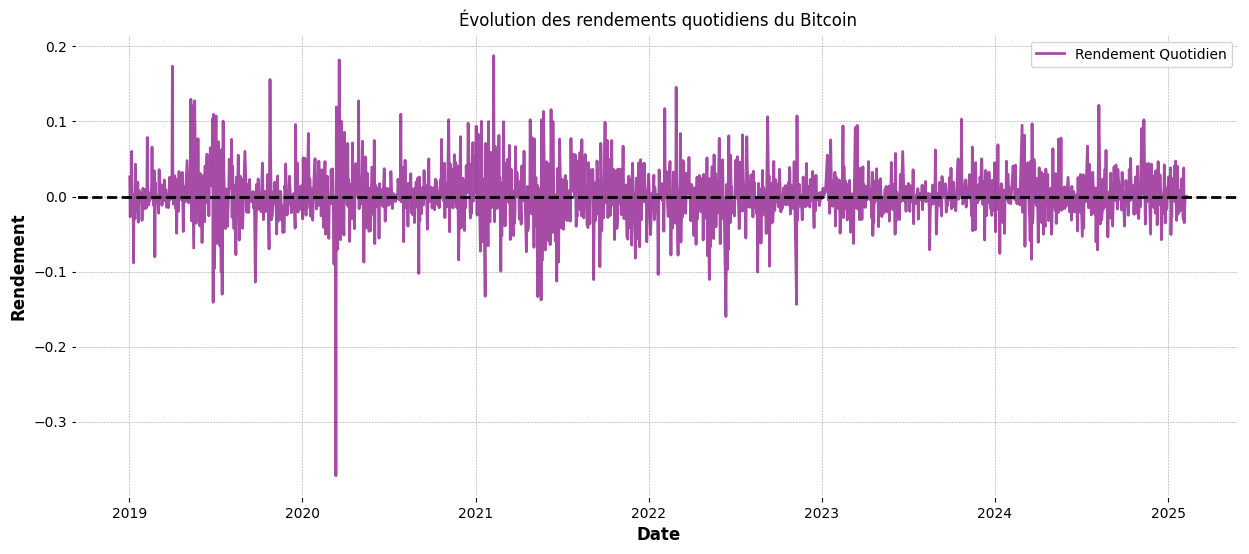

In [135]:
plt.figure(figsize=(15, 6))

# Tracer le rendement quotidien
plt.plot(df.index, df["Daily Return"], label="Rendement Quotidien", color="purple", alpha=0.7)

# Ajouter une ligne horizontale à 0 pour référence
plt.axhline(y=0, color="black", linestyle="dashed")

# Ajouter les labels et la légende
plt.xlabel("Date")
plt.ylabel("Rendement")
plt.title("Évolution des rendements quotidiens du Bitcoin")
plt.legend()

# Afficher le graphique
plt.show()


In [136]:
volatility = df["Daily Return"].std() * (252 ** 0.5)
print(f"Volatilité Annuelle : {volatility:.2%}")


Volatilité Annuelle : 53.52%


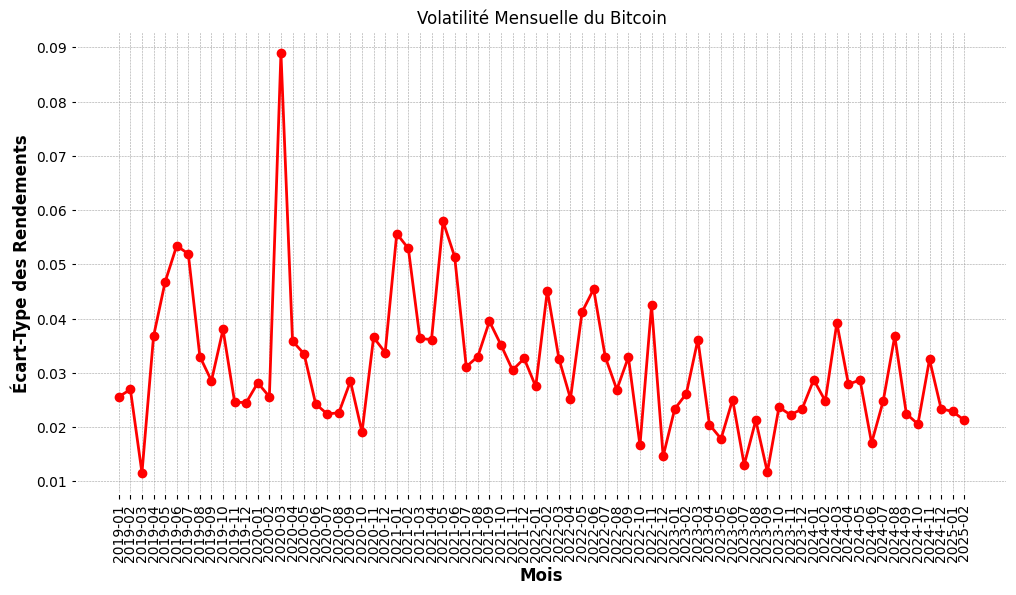

In [137]:
# Créer une colonne "Year-Month" à partir de l'index
df["Year-Month"] = df.index.to_period("M")

# Calcul de la volatilité mensuelle (écart-type des rendements quotidiens)
monthly_volatility = df.groupby("Year-Month")["Daily Return"].std()

# Création du graphique
plt.figure(figsize=(12, 6))
plt.plot(monthly_volatility.index.astype(str), monthly_volatility, marker='o', color="red")

# Rotation des étiquettes de l'axe X pour une meilleure lisibilité
plt.xticks(rotation=90)

# Ajouter le titre et les labels
plt.title("Volatilité Mensuelle du Bitcoin")
plt.xlabel("Mois")
plt.ylabel("Écart-Type des Rendements")

# Afficher le graphique
plt.show()

